In [46]:
from pathlib import Path
import pandas as pd
import torch
import numpy as np
from pathlib import Path
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import v2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_path = Path('../data/dim_sum')

In [104]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
size = 224

In [105]:
def visualize_df(df, ncols=5, transforms = None):
    nrows = len(df) // ncols

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols , figsize=(ncols*1.5, nrows*1.5))

    for (ind, row), ax in zip(df.iterrows(), axes.flatten()):
        img_path = row["image"]
        label = row["label"]

        img = Image.open(img_path)

        img = Image.open(img_path).convert('RGB')
        if transforms is not None:
            img = transforms(img)

        if isinstance(img, torch.Tensor):
            img = img.permute(1,2,0)
            img = img.numpy()
            
        ax.imshow(img)
        ax.set_title(label)
        ax.tick_params(bottom = False, left=False, labelbottom=False, labelleft = False)
        ax.spines[["left", "right", "top", "bottom"]].set_visible(False)

    fig.tight_layout()



In [118]:
df = pd.DataFrame([
    {
        "image" : p,
        "label" : p.parent.name
    }
    for p in data_path.glob("data/*/*")
    ]
)

In [123]:
transforms = v2.Compose([
        v2.ToImage(),
        v2.RandomRotation(degrees=20),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size, antialias=True),
        v2.ColorJitter(brightness = 0.3, contrast = 0.3, saturation = 0.3),
        # v2.ToDtype(torch.float32, scale=True),
        # v2.Normalize(mean=norm_mean, std=norm_std),
    ])

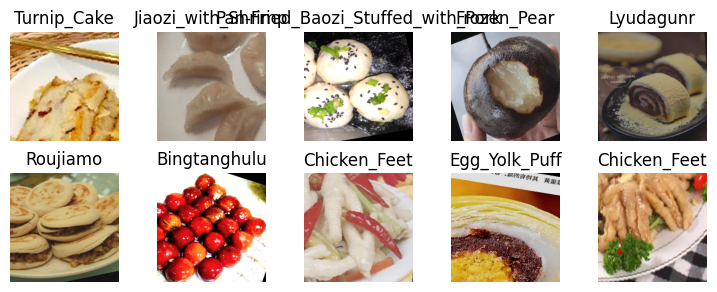

In [124]:
visualize_df(df.sample(10), transforms = transforms)